In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
df=pd.read_csv(r"C:\Users\10726055\Downloads\alerts-data.csv")
df = df.head(10)

In [61]:
df

,ciImpacted,description,kpi,lastModifiedTime,status,alertId
0,M1SCCMHV02.mmi.local,Cluster node M1SCCMHV02.mmi.local in cluster M...,Cluster Node Availability,21-01-2023 09:29,Active,97242184
1,0004svr.banfield.local,The System Center Management Health Service on...,Heartbeat Status Windows,23-01-2023 06:54,Active,87803708
2,CTS-DEVSQA-RTR2.mmi.local,Alert will be triggered if any CTS DC node wil...,CTS Node Down,23-01-2023 11:31,Active,87807873
3,0919SVR.banfield.local,The Windows Storport Miniport Driver has timed...,Request Time Out,24-01-2023 20:14,Active,87822509
4,DEV04BIZ1.mmi.local,The System Center Management Health Service on...,Heartbeat Status Windows,31-01-2023 05:19,Active,103324401
5,m2sccmdp01.mmi.local,The computer m2sccmdp01.mmi.local was not acce...,Server Status,31-01-2023 06:27,Active,103328502
6,l2r7scan01.mmi.local,The System is not responding to heartbeats.,Heartbeat Status Linux,31-01-2023 06:32,Active,103328772
7,M1HVDEV06.mmi.local,The computer M1HVDEV06.mmi.local was not acces...,Server Status,01-02-2023 05:24,Active,105314701
8,M1DMZNET05,The computer M1DMZNET05 was not accessible.,Server Status,01-02-2023 05:52,Active,105315441
9,sb01.mmi.local,The System is not responding to heartbeats.,Heartbeat Status Linux,01-02-2023 09:54,Active,105320445


In [62]:
df.dtypes
df = df.dropna()

In [63]:

df['description']=df['description'].astype(str)

vectorizer = TfidfVectorizer(ngram_range=(3,3))
x=vectorizer.fit_transform(df['description'])


In [64]:
df.dtypes

ciImpacted          object
description         object
kpi                 object
lastModifiedTime    object
status              object
alertId              int64
dtype: object

In [65]:
new_df=df[['description']]

data_encoded=pd.get_dummies(new_df,columns=['description'])
print(data_encoded)

scalar=StandardScaler()
data_scaled=scalar.fit_transform(data_encoded)
#print(data_scalad)
Kmeans=KMeans(n_clusters=5)
new_df['Cluster']=Kmeans.fit_predict(data_scaled)

   description_Alert will be triggered if any CTS DC node will be down  \
0                                              False                     
1                                              False                     
2                                               True                     
3                                              False                     
4                                              False                     
5                                              False                     
6                                              False                     
7                                              False                     
8                                              False                     
9                                              False                     

   description_Cluster node M1SCCMHV02.mmi.local in cluster M1SCCMHVCL01 is not running.  \
0                                               True                                       
1

C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\10726055\AppData\Local\Temp\ipykernel_19664\2596351103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster']=Kmeans.fit_predict(data_

C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

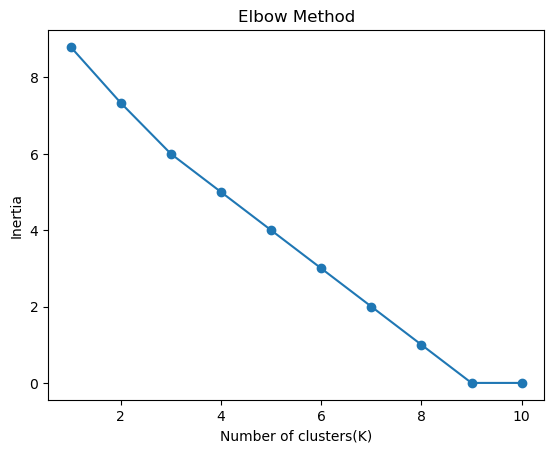

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(data_encoded)
    inertia.append(Kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

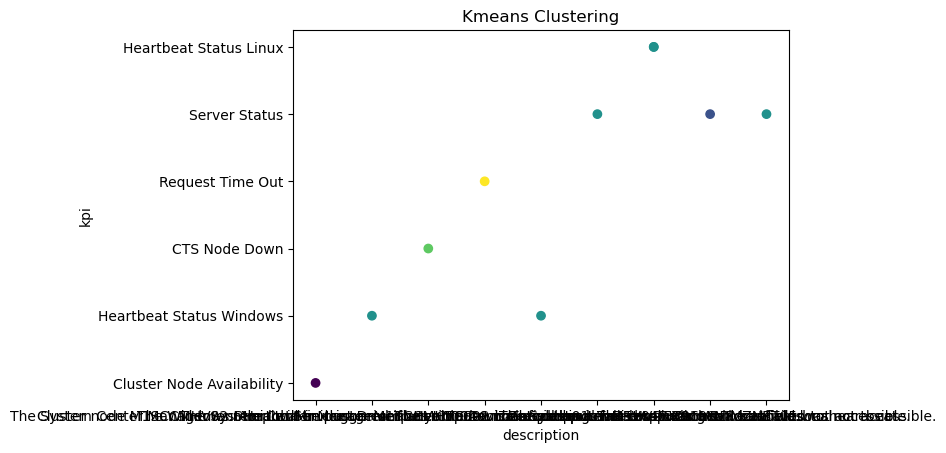

In [67]:
import matplotlib.pyplot as plt
plt.scatter(new_df['description'],df['kpi'],c=new_df['Cluster'],cmap='viridis')
plt.xlabel('description')
plt.ylabel('kpi')
plt.title('Kmeans Clustering')
plt.show()
